# Random Forest - Regression
---
The Data
---
We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is, and you have to find out


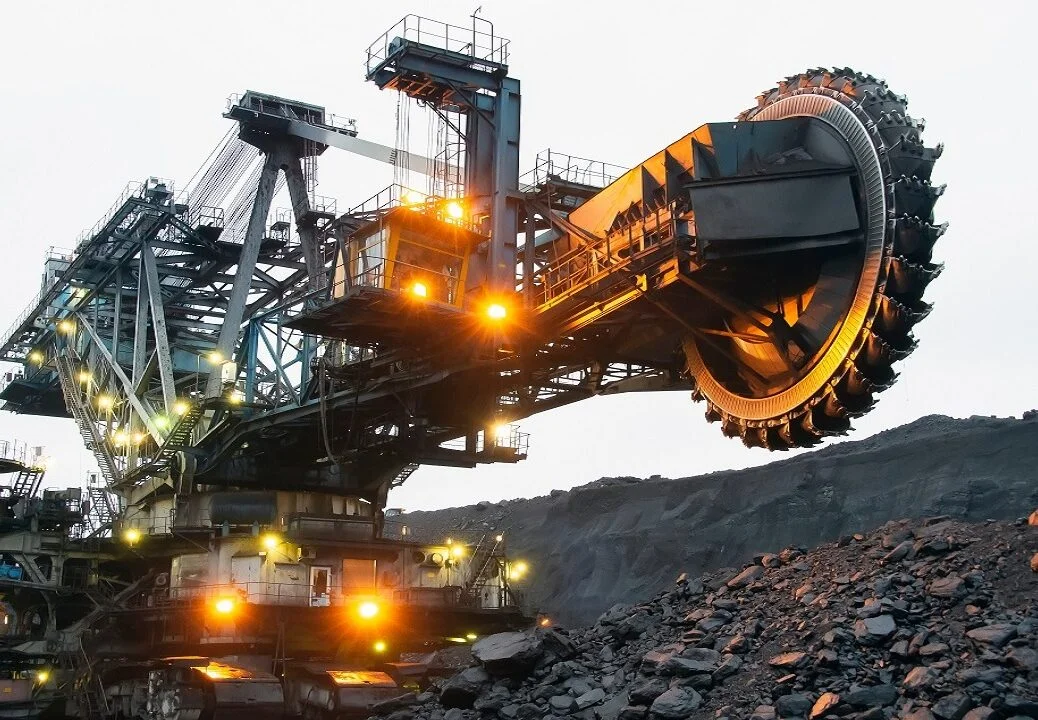

In [1]:
from IPython.display import display
from PIL import Image
img_PIL = Image.open(r'/Users/rahulsharma/Documents/jose+portillia+ml/my+notes/photos/Feature-Image-top-ten-metals-and-mining-companies-1038x720.jpg.webp')
display(img_PIL)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'/Users/rahulsharma/Documents/jose+portillia+ml/DATA/rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns=['Signal',"Density"]

<AxesSubplot:xlabel='Signal', ylabel='Density'>

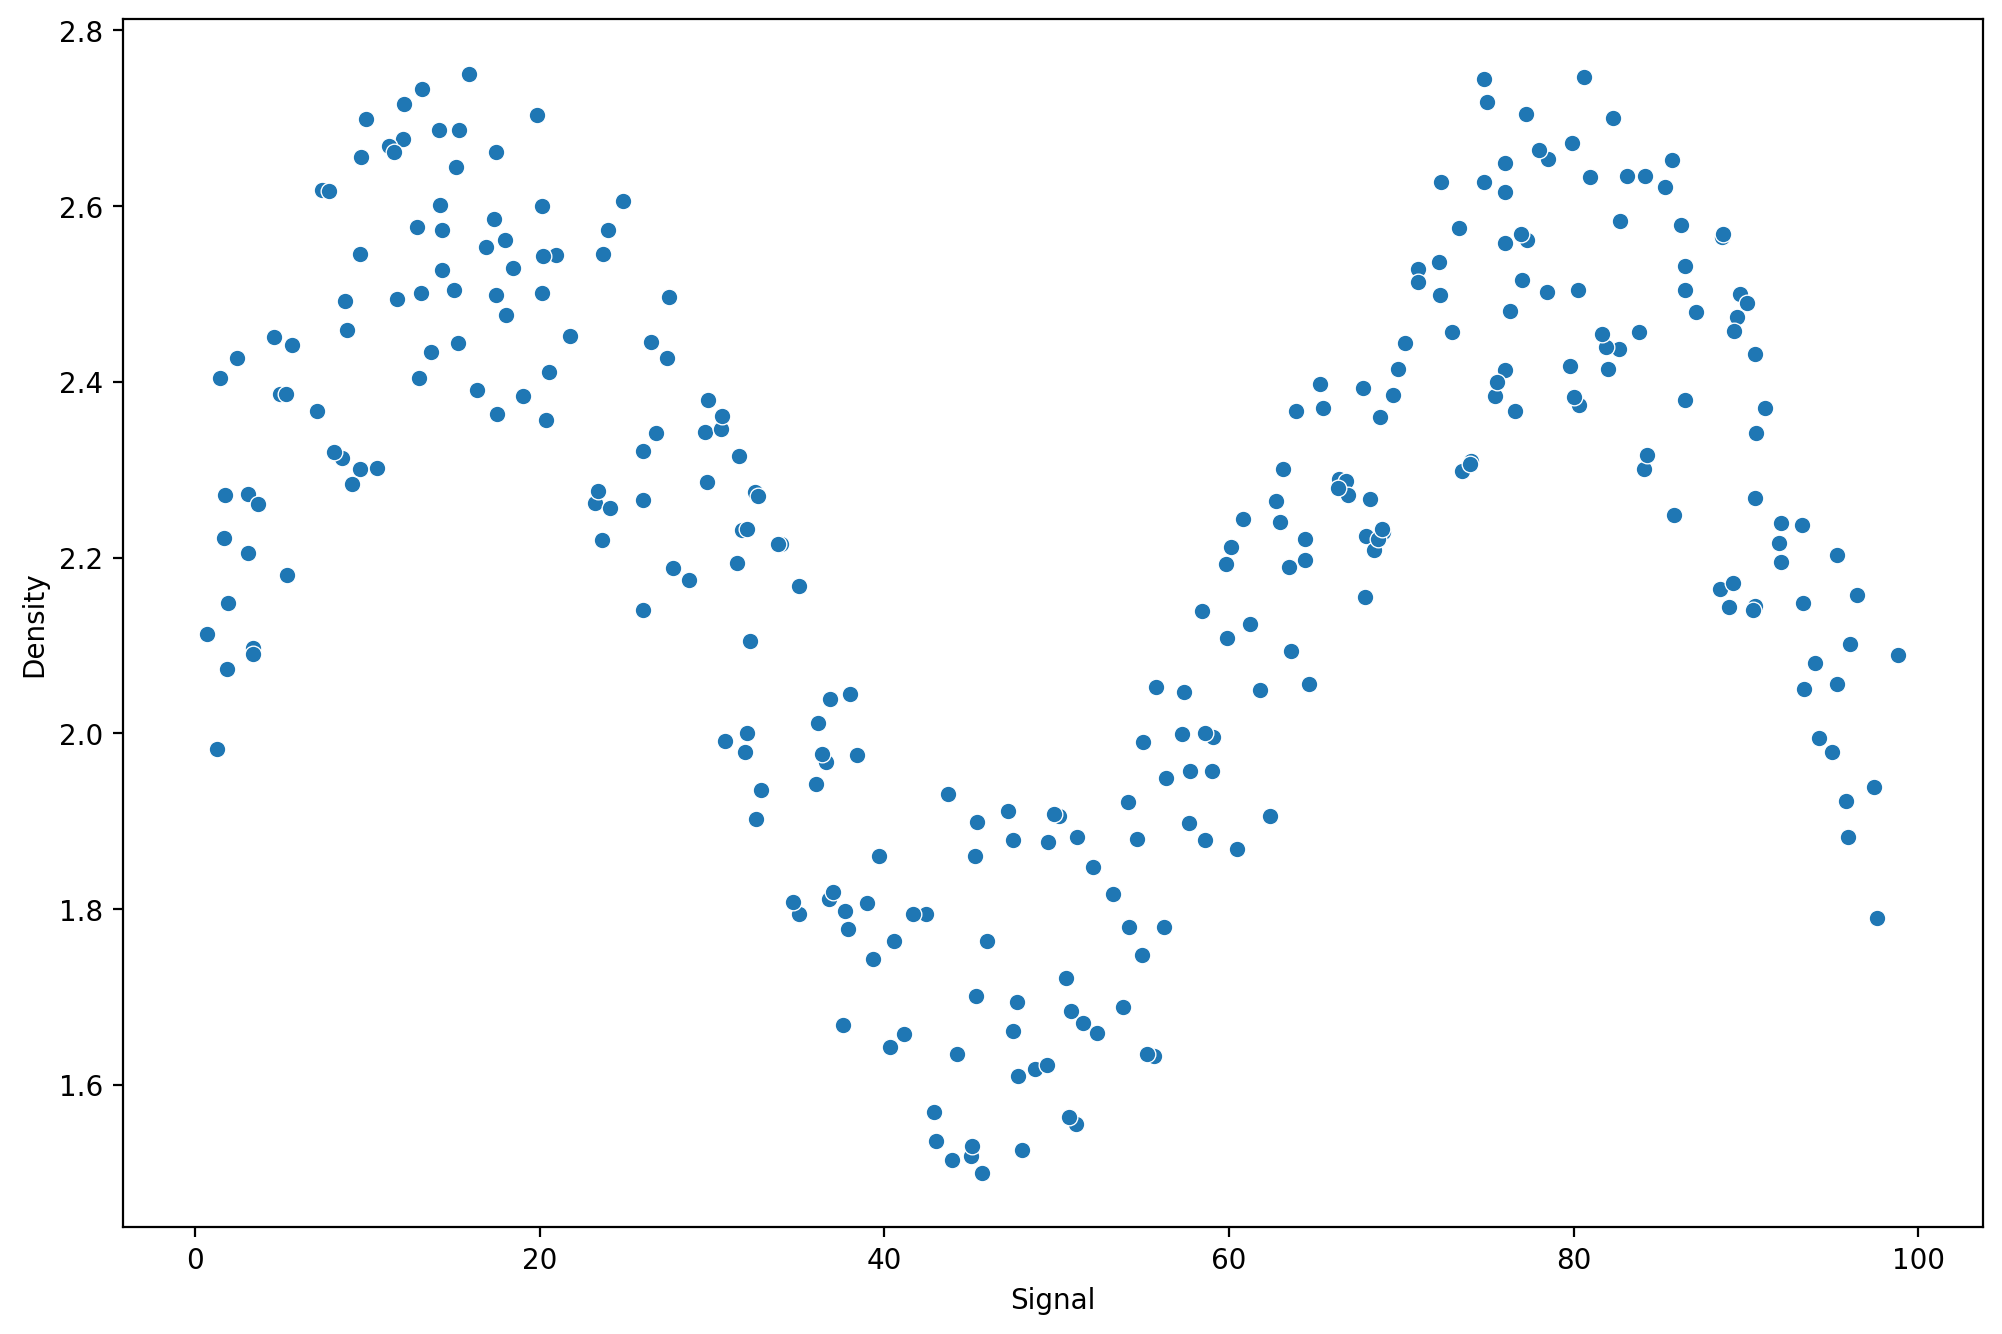

In [5]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

In [6]:
X = df['Signal'].values.reshape(-1,1) # otherwise gives error during the linear reg model because it have single 
# feature

y = df['Density']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Linear Regression 

In [9]:
from sklearn.linear_model import LinearRegression

In [29]:
lr_model = LinearRegression()

In [30]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [31]:
lr_preds = lr_model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [33]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

In [34]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [36]:
signal_range = np.arange(0,100)

lr_output = lr.predict(signal_range.reshape(-1,1))

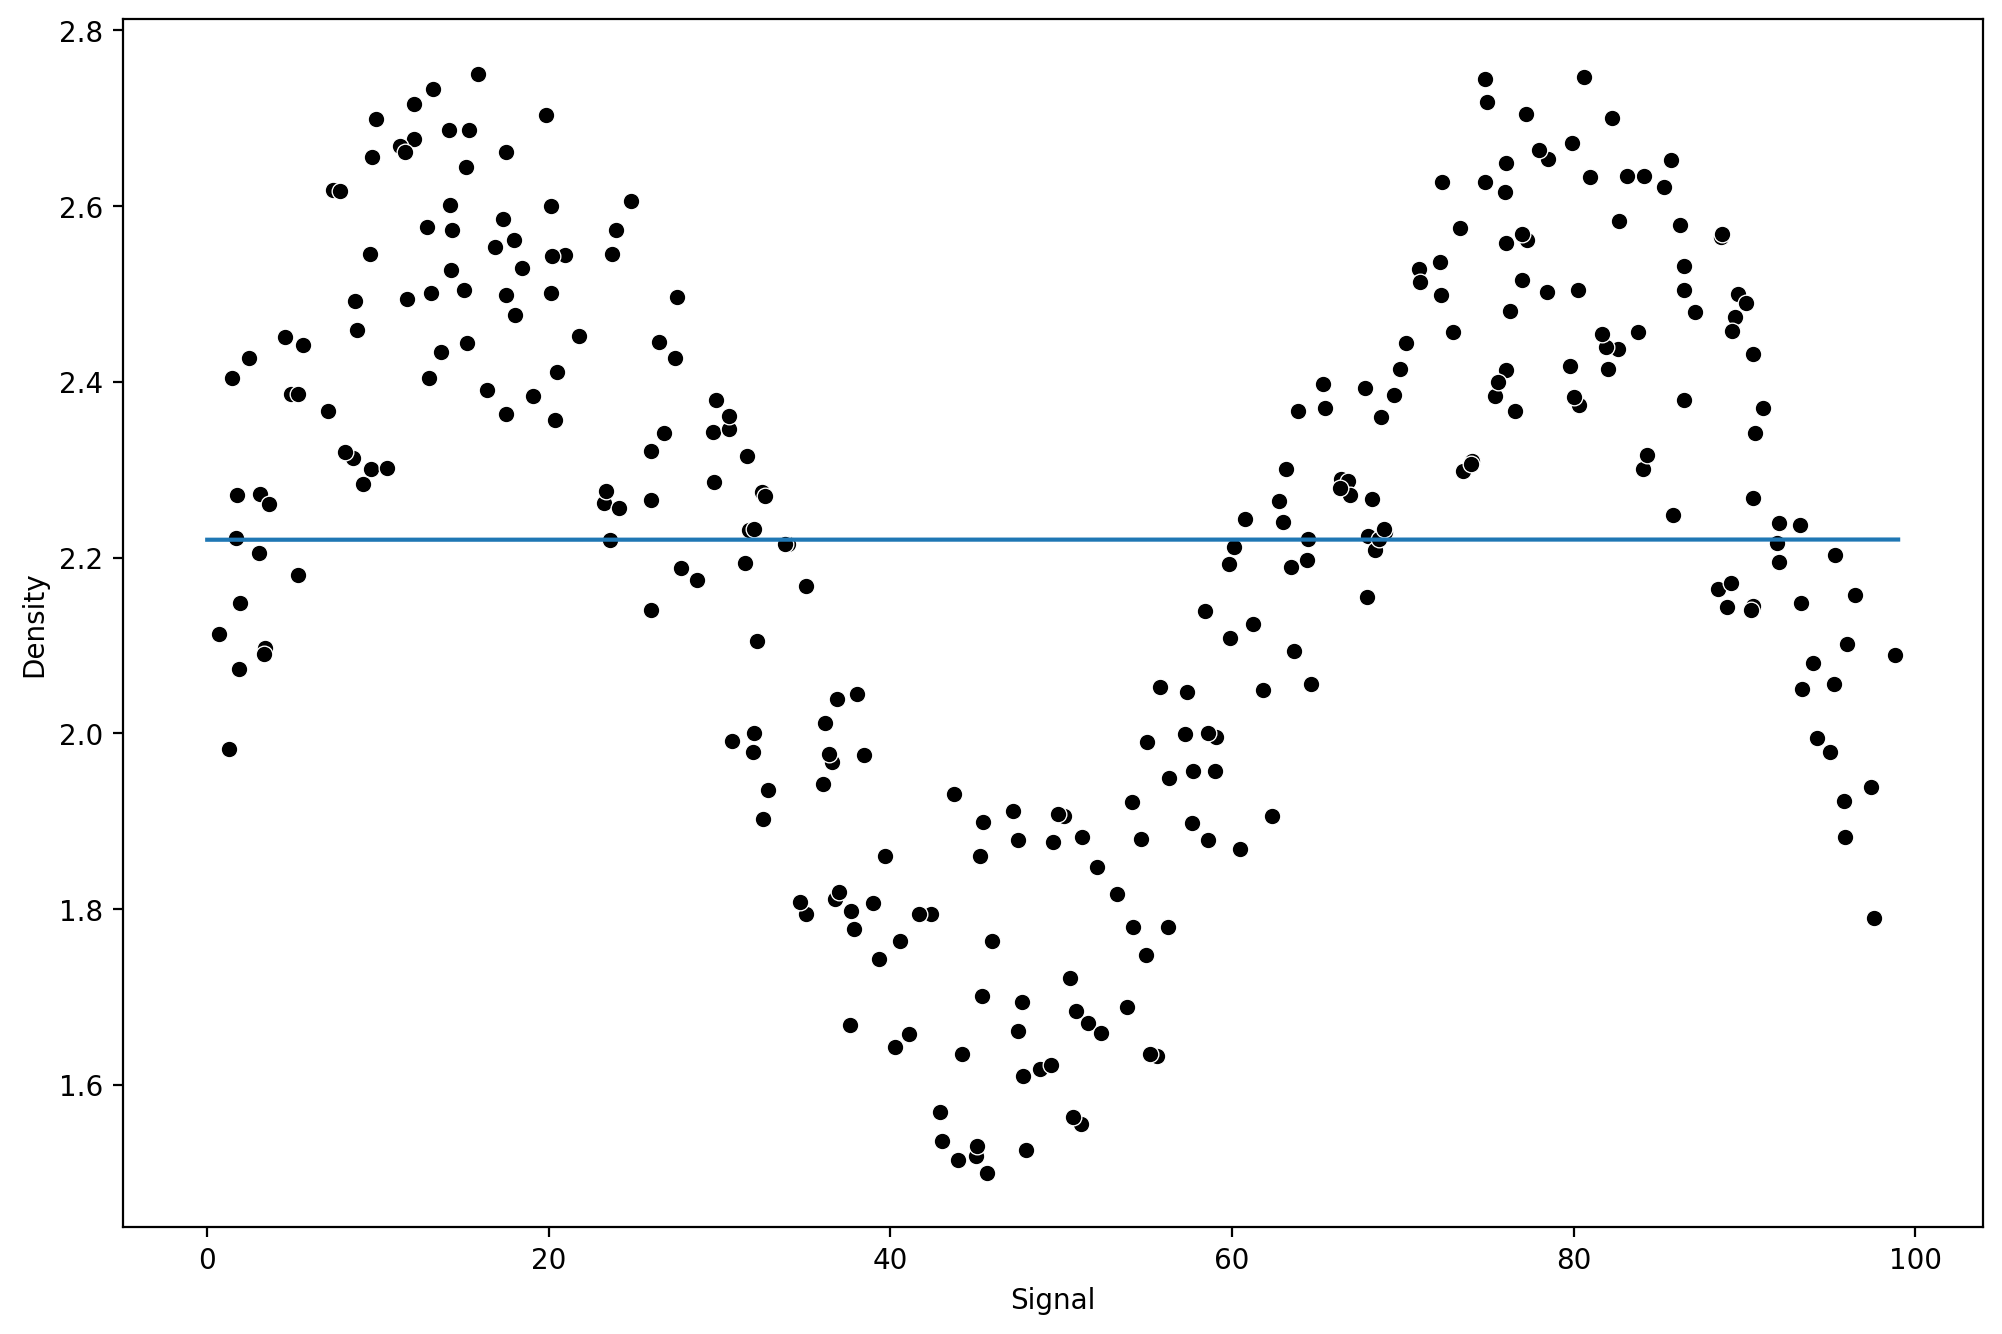

In [37]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')

plt.plot(signal_range,lr_output)

# Polynomial Regression

### Attempting with a Polynomial Regression Model
Let's explore why our standard regression approach of a polynomial could be difficult to fit here, keep in mind, we're in a fortunate situation where we can easily visualize results of y vs x.

### Function to Help Run Models¶

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [41]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit model training
    model.fit(X_train,y_train)
    
    # get metrics
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f'RMSE:{rmse}')
    print(f'MAE:{mae}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE:0.2570051996584629
MAE:0.211198973318633


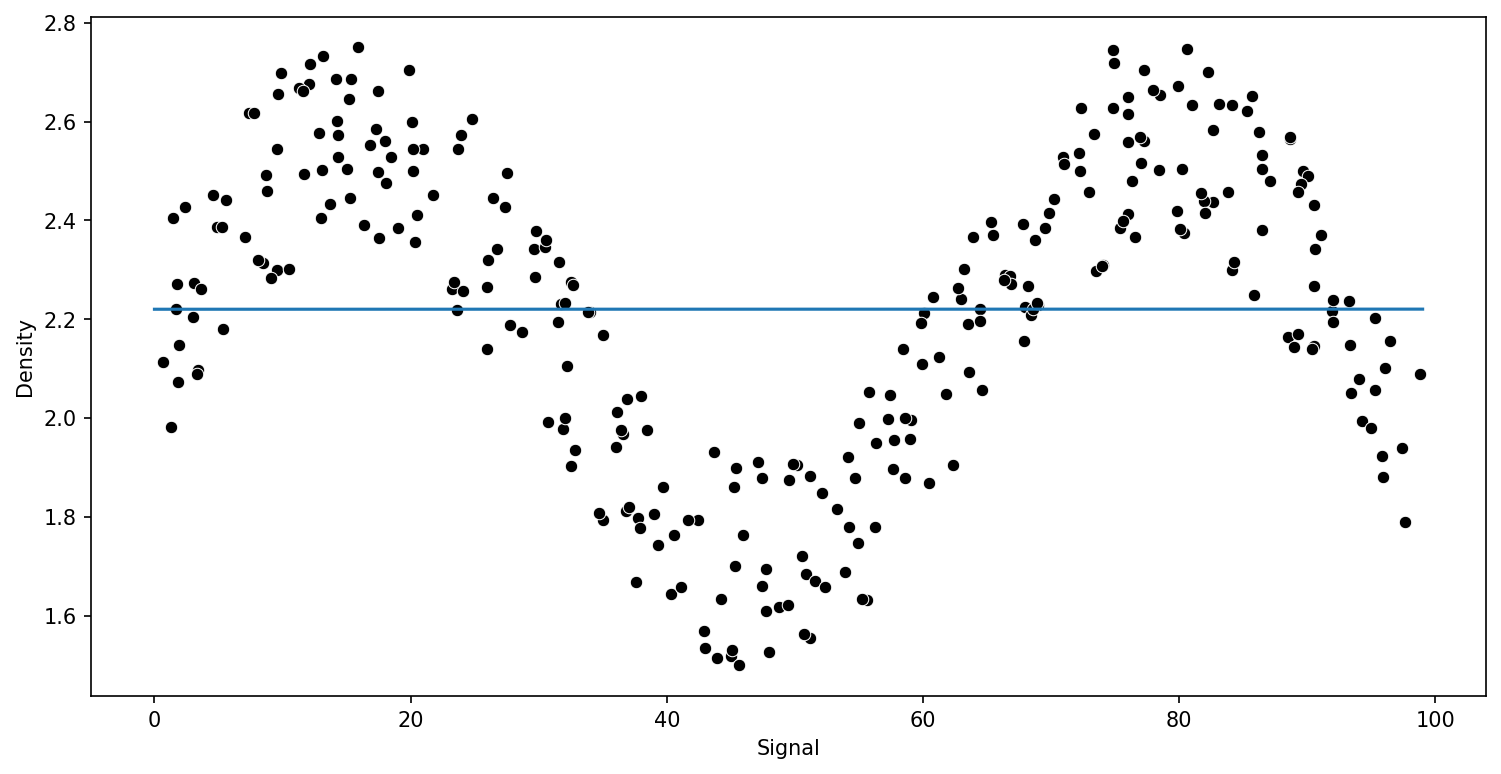

In [42]:
run_model(model,X_train,y_train,X_test,y_test)

# Pipeline for Poly Orders

In [22]:
from sklearn.pipeline import make_pipeline

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
pipe = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

RMSE:0.2817309563725596
MAE:0.22903105443511335


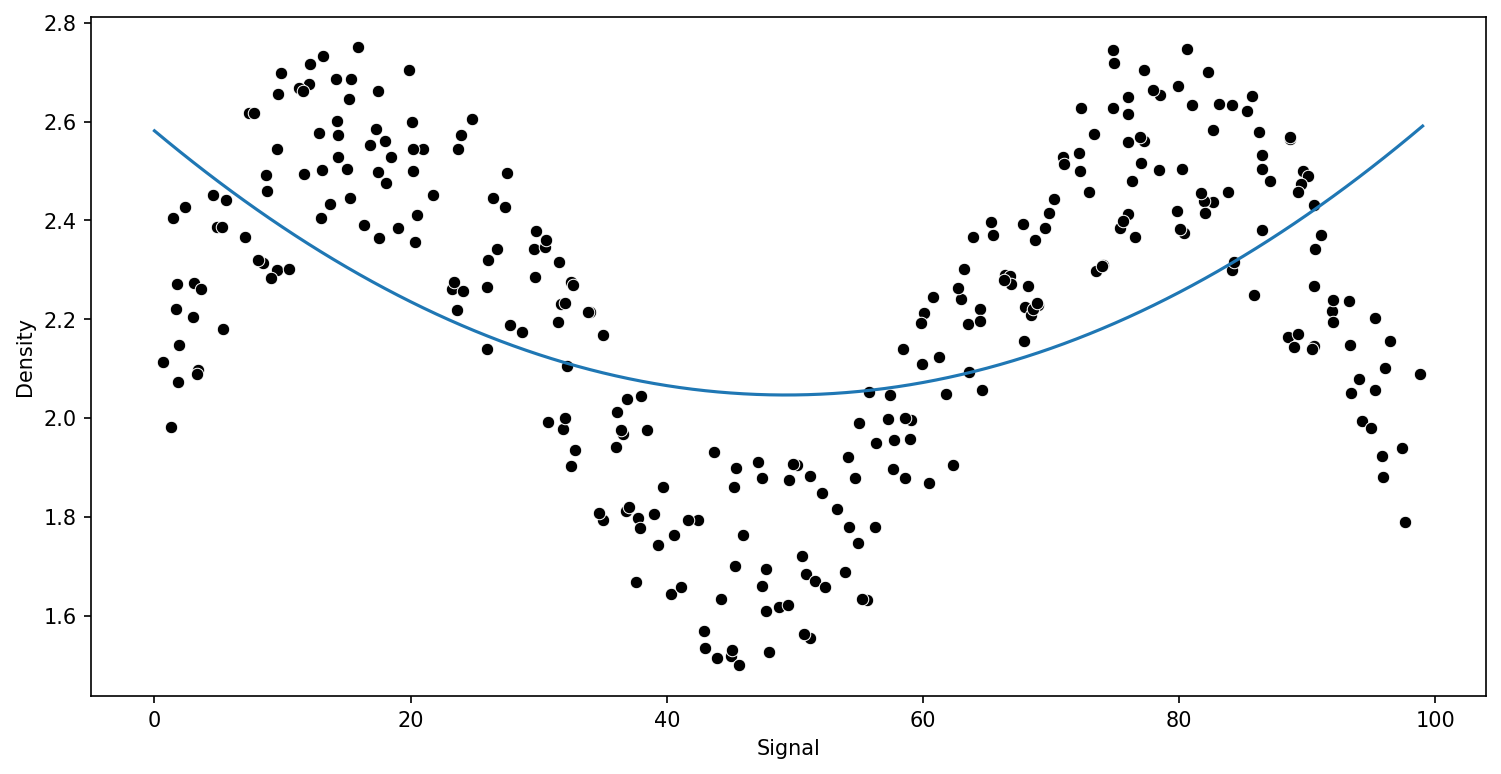

In [25]:
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE:0.1400917280701832
MAE:0.12446909469912477


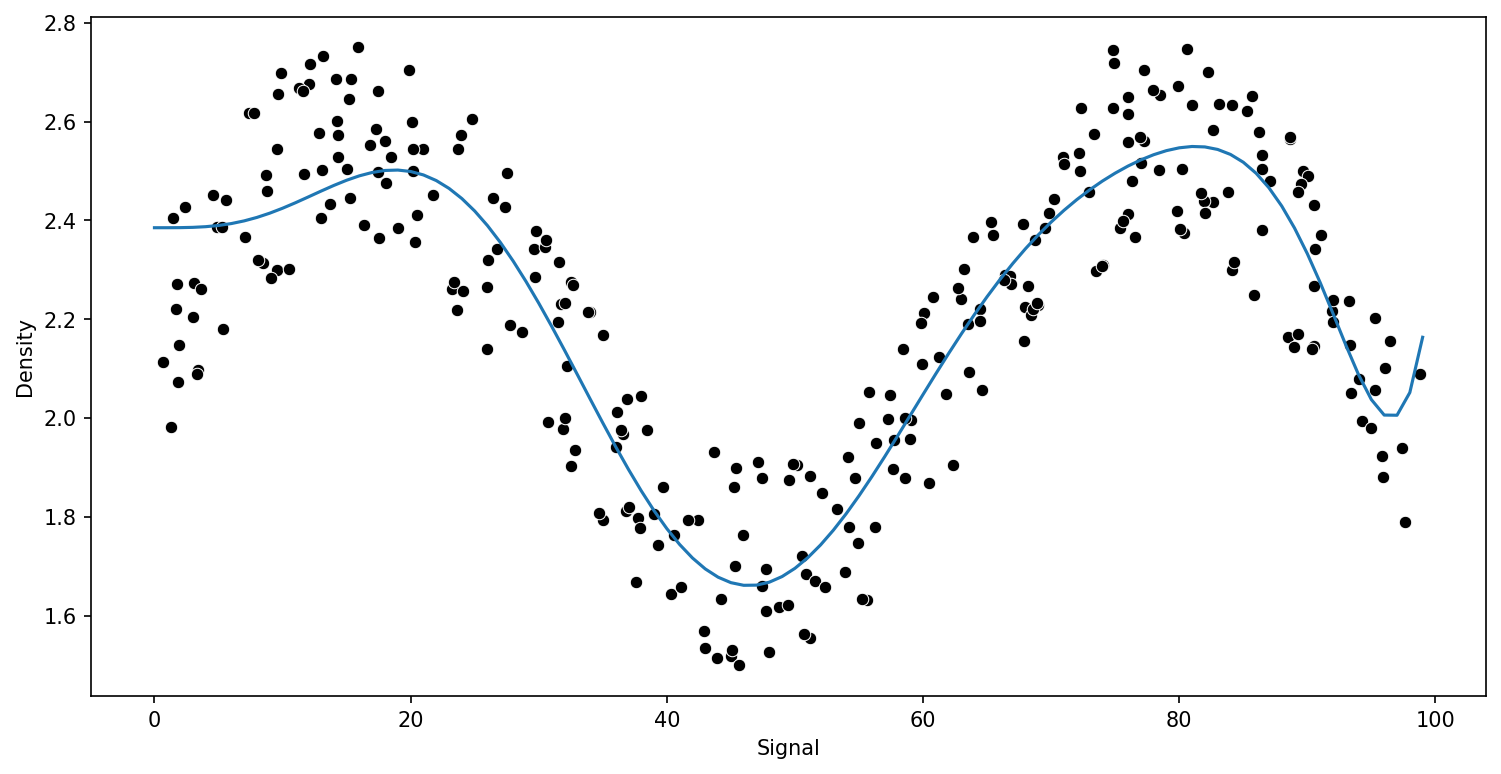

In [44]:
pipe = make_pipeline(PolynomialFeatures(degree=10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

## KNN Regression

In [50]:
from sklearn.neighbors import KNeighborsRegressor

RMSE:0.1523487028635337
MAE:0.11877297474442378
RMSE:0.13730685016923647
MAE:0.12198383614100558
RMSE:0.13277855732740926
MAE:0.11635971693292672


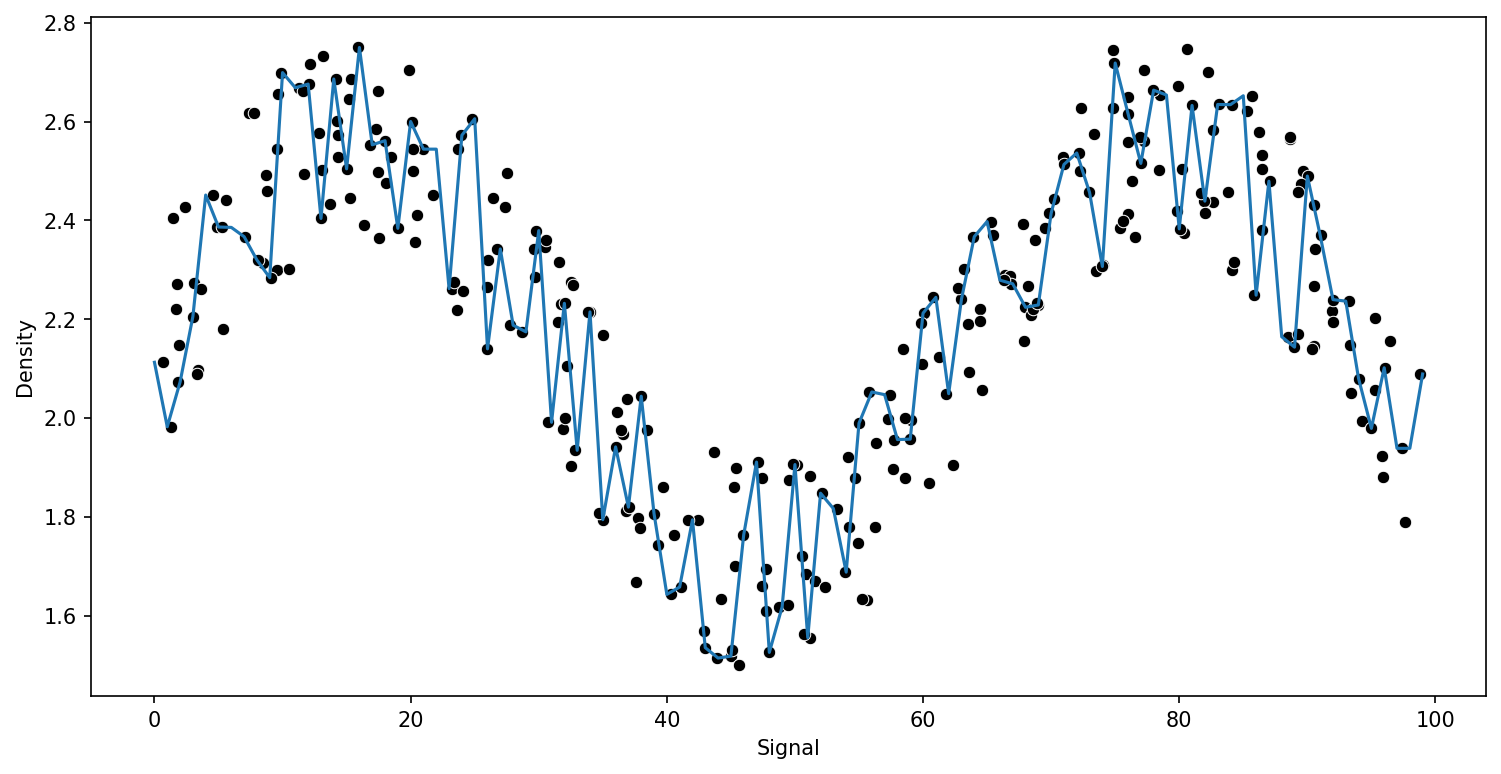

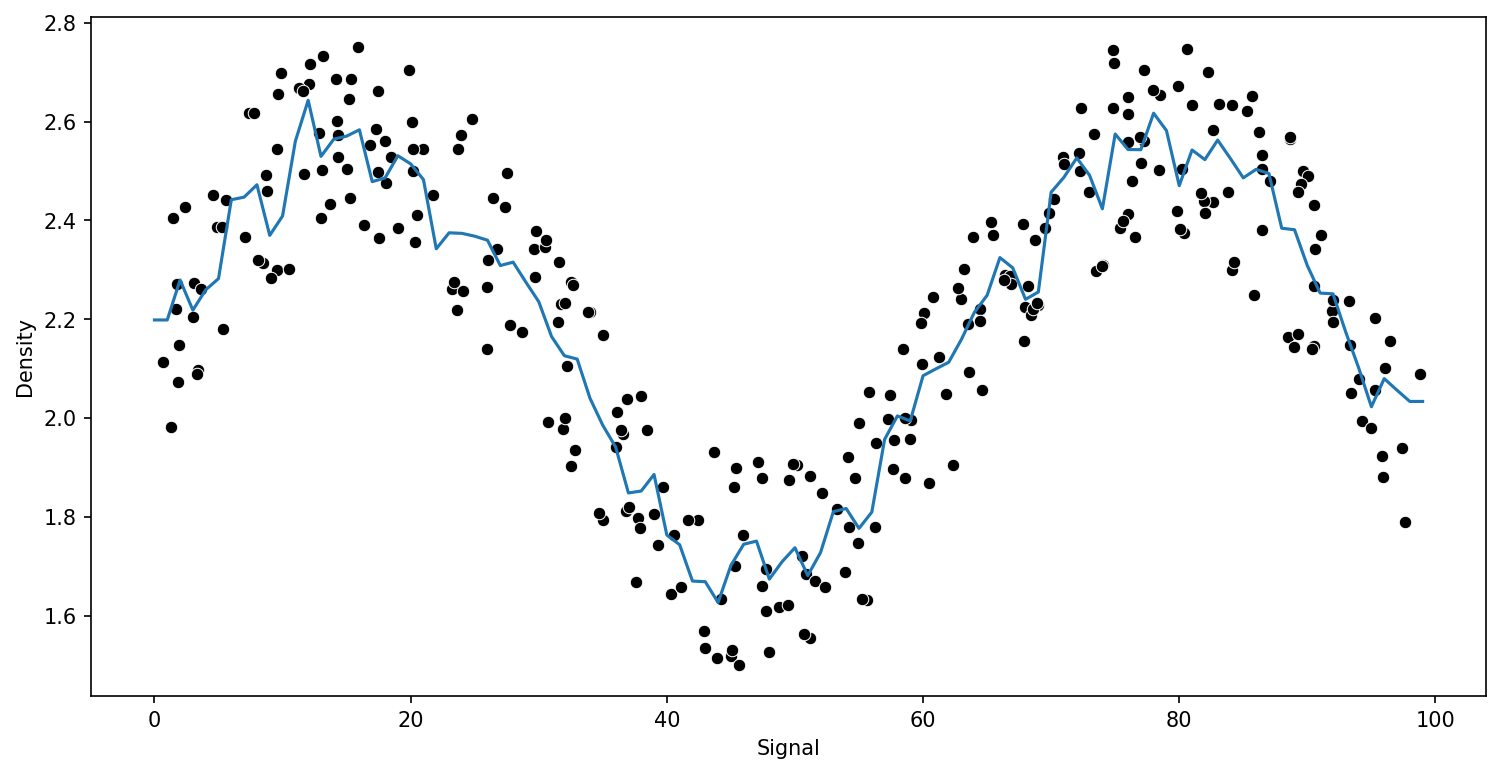

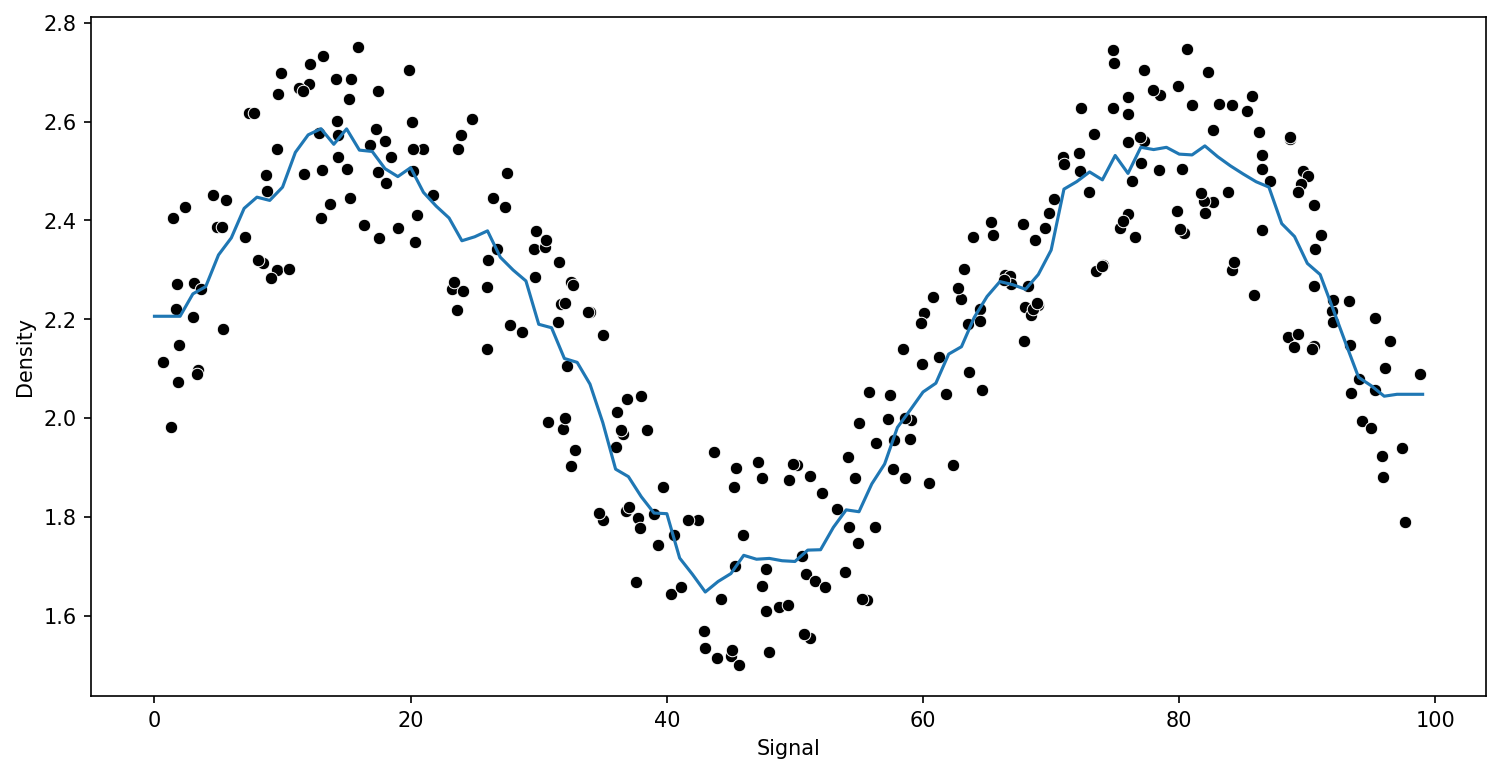

In [53]:
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

#### As the k values increases, you introduce to more bias and, you're not going to fitting much noise in your model and the curve gonna be little better.

# Decision Tree Regression

In [54]:
from sklearn.tree import DecisionTreeRegressor

RMSE:0.1523487028635337
MAE:0.11877297474442378


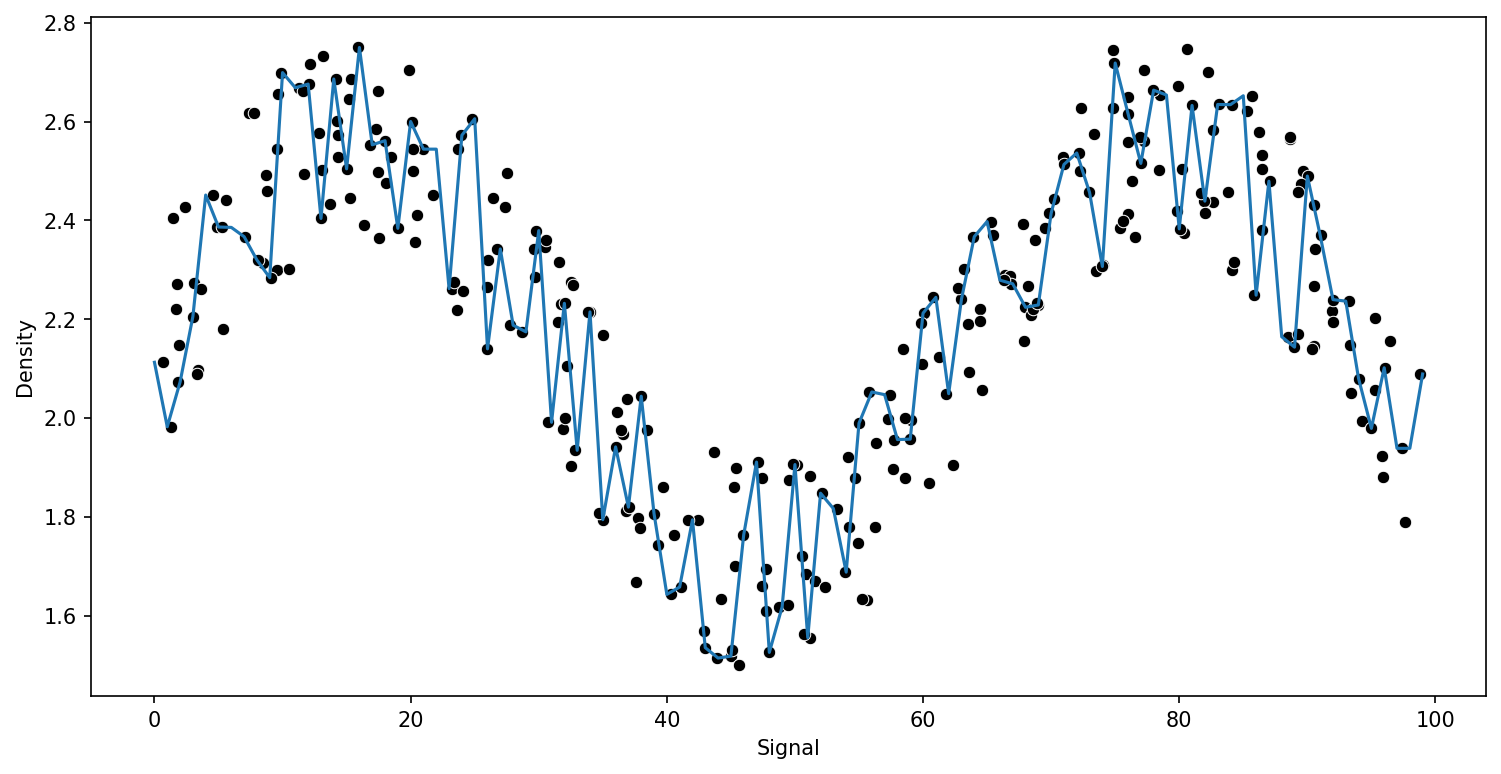

In [57]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

####  conclusion:- Very noisy to pick up the data it's like having smaller k value for k neighbors classifier 

In [58]:
from sklearn.svm import SVR

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
svr = SVR()
param_grid = {'C':[.01,.1,1,5,10,100,100],'gamma':['auto','scale']}


grid = GridSearchCV(svr,param_grid)

RMSE:0.13015742723601859
MAE:0.11243103141069337


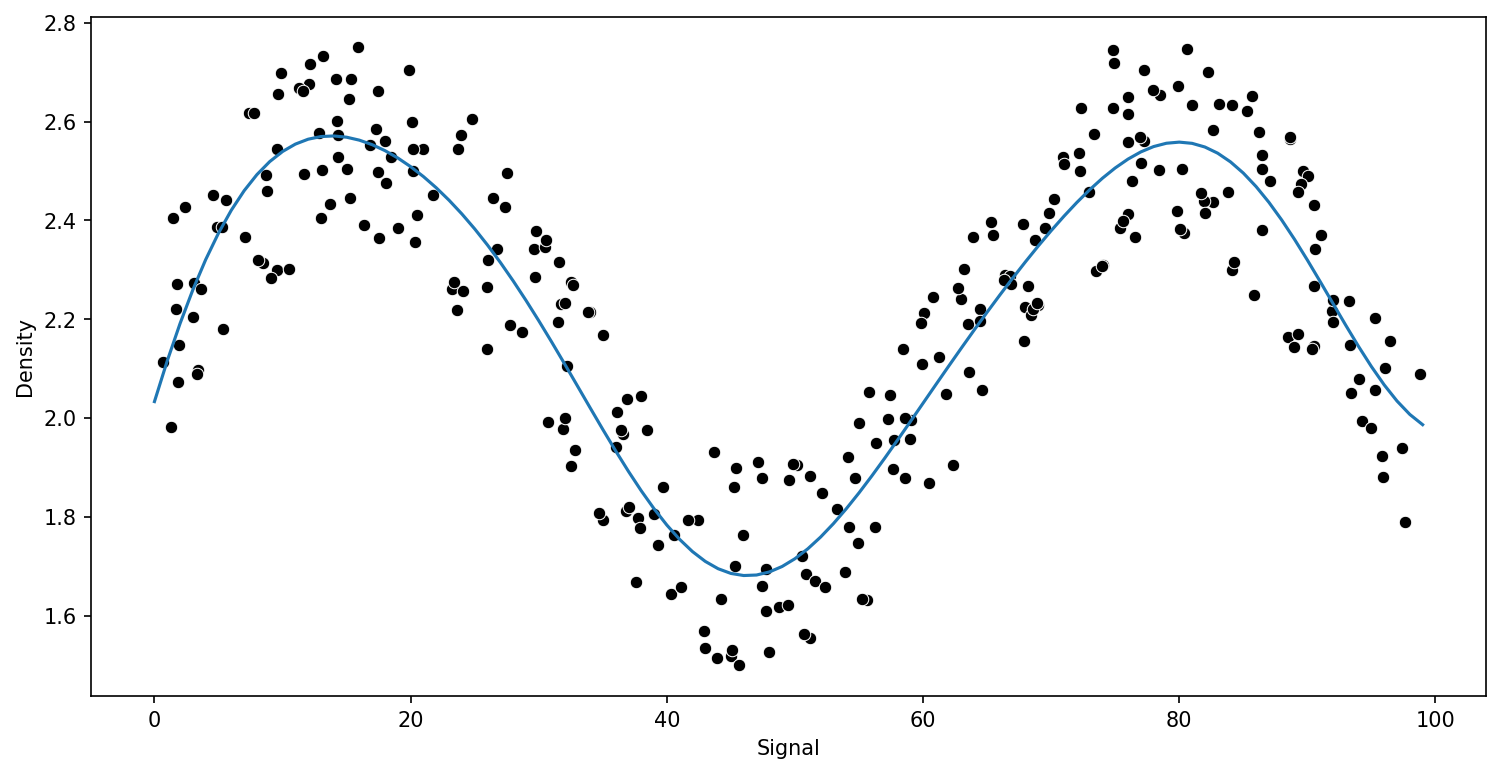

In [61]:
run_model(grid,X_train,y_train,X_test,y_test)

#### the support vector model performs quite well maybe not as good as polynomial bbut performs good as comparisons to the other models

# Random Forest Regression¶

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rfr = RandomForestRegressor(n_estimators=10)
# high no of estimators doesn't effect this much because, it have only 1 single feature

RMSE:0.13413384628148758
MAE:0.11378041399713366


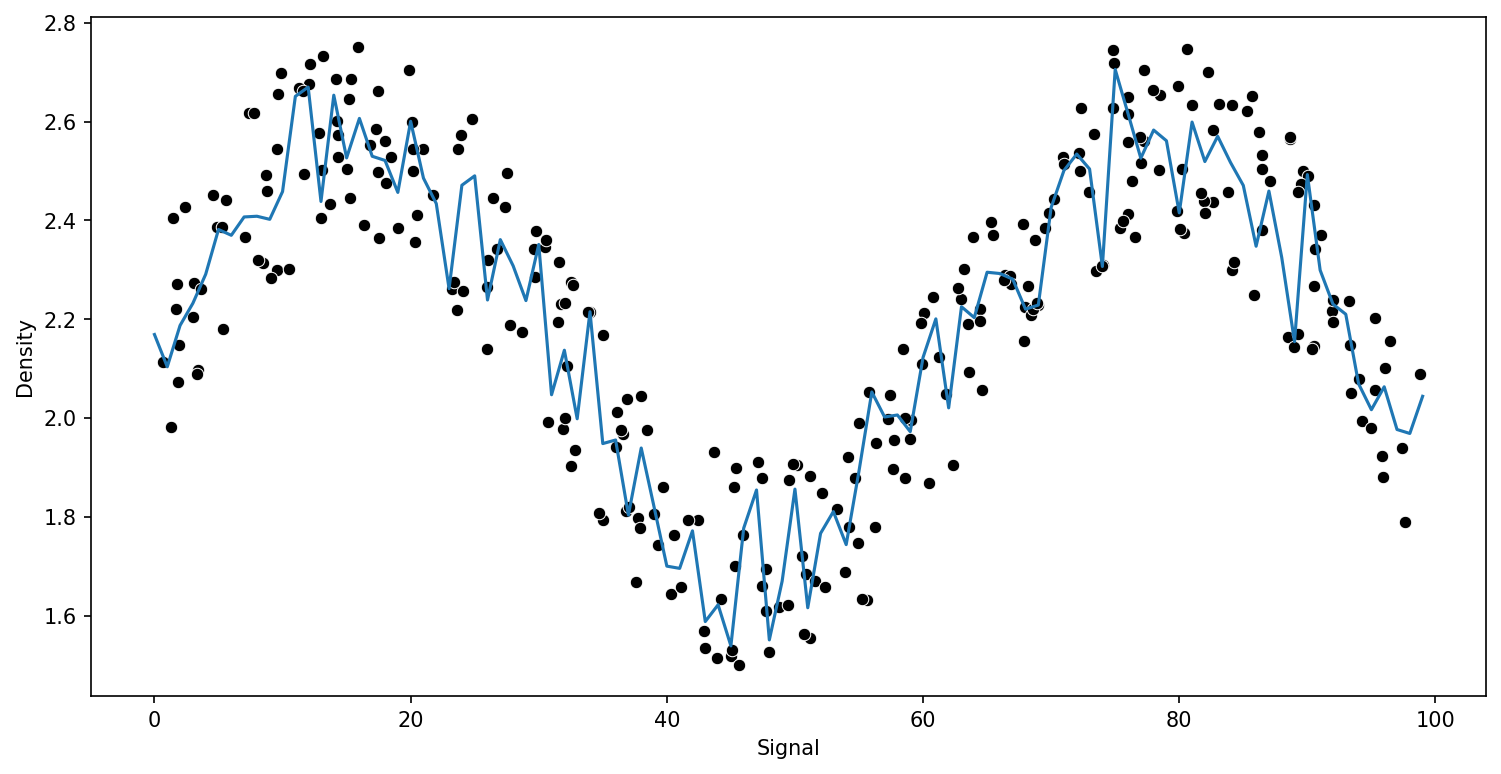

In [65]:
run_model(rfr,X_train,y_train,X_test,y_test)

#### conclusion :- similar to the decision tree, because it have only one feature

In [66]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

RMSE:0.13294148649584667
MAE:0.11318284854800689


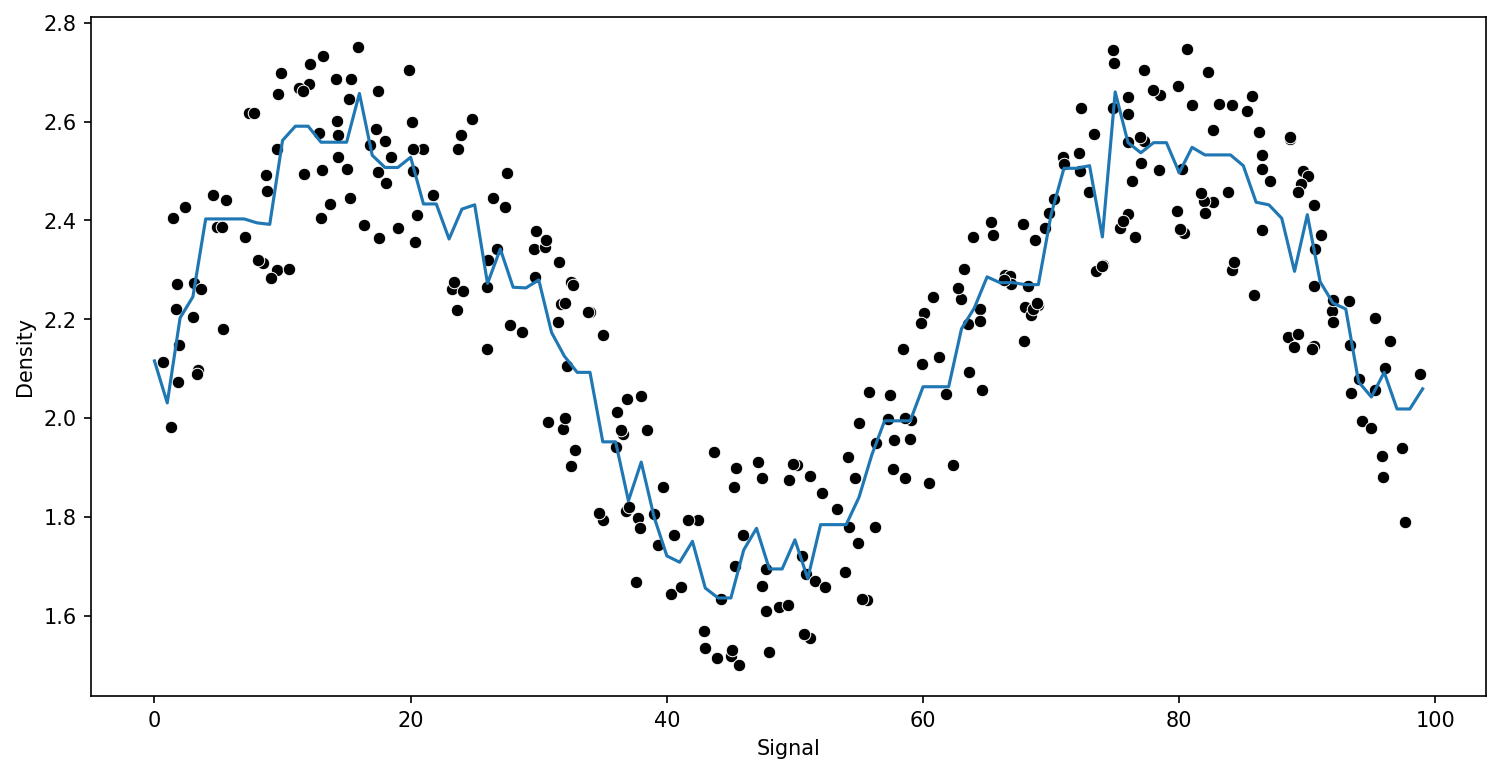

In [67]:
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

RMSE:0.1372035032368211
MAE:0.11805898084442322


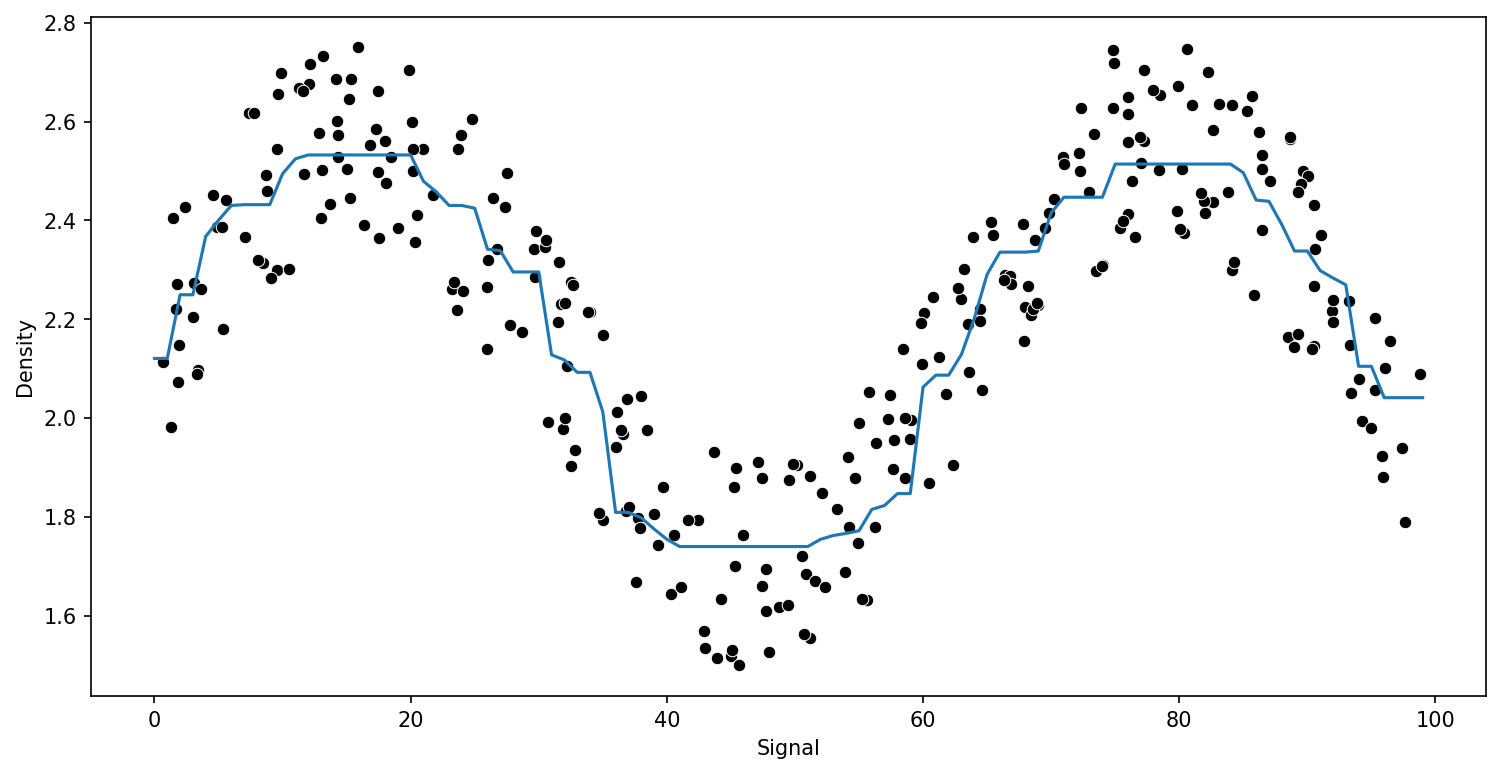

In [69]:
model = AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)